In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

In [ ]:
import torch.optim as optim #implement various optimization algorithms like SGD and Adam
import torch.nn.functional as F #For non linear activation functions
from torchvision import datasets


In [ ]:
trainset = datasets.FashionMNIST('~/.pytorch/F MNIST data', download=True, train=True, transform=transforms.ToTensor())
testset = datasets.FashionMNIST('~/.pytorch/F MNIST data', download=True, train=False, transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F MNIST data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F MNIST data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F MNIST data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F MNIST data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F MNIST data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F MNIST data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F MNIST data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F MNIST data/FashionMNIST/raw



In [ ]:
batch_size = 100
train_loader = DataLoader(dataset=trainset, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(dataset=testset, batch_size=10000,shuffle=True)
samples, labels = iter(train_loader).next()
print(samples.shape)
print(len(train_loader))

torch.Size([100, 1, 28, 28])
600


In [ ]:
# iter1 = iter(train_loader)
# samples, labels = iter1.next()
# print(labels.shape)
# print(samples[99][0].shape)

device = torch.device('cpu')
#for i in range(6):
 # plt.subplot

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.enc1 = nn.Linear(784, 128)  # 784-28-10-28-784
    self.enc2 = nn.Linear(128, 64)
    self.enc3 = nn.ReLU()
    self.dec1 = nn.Linear(64, 128)
    self.dec2 = nn.Linear(128, 784)

    # nn.init.xavier_uniform_(self.enc1.weight)
    # nn.init.zeros_(self.enc1.bias)
    # nn.init.xavier_uniform_(self.enc2.weight)
    # nn.init.zeros_(self.enc2.bias)
    # nn.init.xavier_uniform_(self.dec1.weight)
    # nn.init.zeros_(self.dec1.bias)
    # nn.init.xavier_uniform_(self.dec2.weight)
    # nn.init.zeros_(self.dec2.bias)

  def encode(self, x):
    z = torch.tanh(self.enc1(x))
    z = torch.tanh(self.enc2(z))  # act depends on scenario
    z = torch.tanh(self.enc3(z))
    return z  

  def decode(self, x):
    z = torch.tanh(self.dec1(x))
    z = self.dec2(z)  # no activation
    return z        

  def forward(self, x):
    z = self.encode(x)
    z = self.decode(z)
    return z


In [ ]:
#setting seed and defining parameters
torch.manual_seed(1)
np.random.seed(1)
learning_rate = 1e-5
num_epochs = 10

#defining model
model = Net()

#loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#tell model that we are training
model.train()

n_total_steps = len(train_loader)
#training loop
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    #forward pass and loss
    images = images.reshape(-1,784).to(device)
    labels = labels.to(device)
    out_images = model(images)
    loss = criterion(out_images,images)

    #zero_grads 
    optimizer.zero_grad()

    #backward pass
    loss.backward()

    #update
    optimizer.step()

    #print step
    if (i+1)%600 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

    


epoch 1 / 10, step 600/600, loss = 0.1099
epoch 2 / 10, step 600/600, loss = 0.0767
epoch 3 / 10, step 600/600, loss = 0.0522
epoch 4 / 10, step 600/600, loss = 0.0463
epoch 5 / 10, step 600/600, loss = 0.0455
epoch 6 / 10, step 600/600, loss = 0.0448
epoch 7 / 10, step 600/600, loss = 0.0439
epoch 8 / 10, step 600/600, loss = 0.0371
epoch 9 / 10, step 600/600, loss = 0.0387
epoch 10 / 10, step 600/600, loss = 0.0345


In [ ]:
model.eval()
with torch.no_grad():
  for (images, labels) in test_loader:
    images = images.reshape(-1,784).to(device)
    labelse = labels.to(device)
    out_images = model.encode(images)

  print(out_images.shape)

torch.Size([10000, 64])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 3.128s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.206644
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.692696
[t-SNE] KL divergence after 1000 iterations: 1.347548


[Text(0.5, 1.0, 'Fashion-MNIST data visualization')]

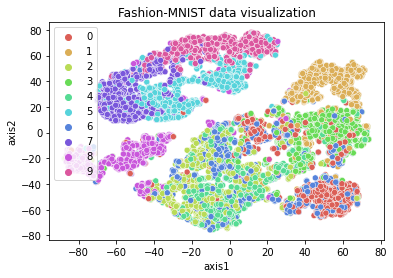

In [ ]:
import seaborn as sn
import pandas as pd
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1, random_state = 123)
z = tsne.fit_transform(out_images)
df = pd.DataFrame()
df["y"] = labelse
df["axis1"] = z[:,0]
df["axis2"] = z[:,1]

sn.scatterplot(x = "axis1", y = "axis2", hue = df.y.tolist(), palette = sn.color_palette("hls", 10), data = df).set(title = "Fashion-MNIST data visualization")
